<a href="https://colab.research.google.com/github/ritvik-chebolu/Twitter-Live-Sentiment-Analysis/blob/main/Twitter_Live_Feed_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tweepy
import re
from textblob import TextBlob
from wordcloud import WordCloud
from getpass import getpass
plt.style.use('fivethirtyeight')

# Access Tokens and API keys

Get these details from https://developer.twitter.com/en/portal/projects/ after signing in on Twitter.

In [26]:
consumer_key = getpass('Enter the consumer_key: ')
consumer_secret = getpass('Enter the consumer_secret: ')
access_token = getpass('Enter the access_token: ')
access_token_secret = getpass('Enter the access_token_secret: ')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

Enter the consumer_key: ··········
Enter the consumer_secret: ··········
Enter the access_token: ··········
Enter the access_token_secret: ··········


In [27]:
query = input("Query::  ")
public_tweets = api.search(query, count = 20000, lang = 'en')

#public_tweets = api.user_timeline(screen_name = 'Ken Jee')

i = 1
for tweet in public_tweets[0:10]:
  print('\n----Start of tweet----')
  print(str(i) + ') ' + tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment)
  print('----End of tweet----\n')
  i = i + 1

Query::  Maple Leafs

----Start of tweet----
1) @Stake Toronto maple leafs
Sentiment(polarity=0.0, subjectivity=0.0)
----End of tweet----


----Start of tweet----
2) RT @SNstats: William Nylander becomes the 8th-fastest player to 400 career points in Maple Leafs history among players to debut with Toront…
Sentiment(polarity=0.0, subjectivity=0.0)
----End of tweet----


----Start of tweet----
3) RT @MandyMiracle1: The Maple Leafs game is tied 2-2
#leafs
Sentiment(polarity=-0.4, subjectivity=0.4)
----End of tweet----


----Start of tweet----
4) RT @SNstats: William Nylander becomes the 8th-fastest player to 400 career points in Maple Leafs history among players to debut with Toront…
Sentiment(polarity=0.0, subjectivity=0.0)
----End of tweet----


----Start of tweet----
5) RT @SNstats: William Nylander becomes the 8th-fastest player to 400 career points in Maple Leafs history among players to debut with Toront…
Sentiment(polarity=0.0, subjectivity=0.0)
----End of tweet----


----Start of 

In [28]:
df = pd.DataFrame([tweet.text for tweet in public_tweets], columns = ['Tweets'])

#df = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns = ['Tweets']) ---- for the api.user_timeline code 


df.head()

,Tweets
0,@Stake Toronto maple leafs
1,RT @SNstats: William Nylander becomes the 8th-...
2,RT @MandyMiracle1: The Maple Leafs game is tie...
3,RT @SNstats: William Nylander becomes the 8th-...
4,RT @SNstats: William Nylander becomes the 8th-...


In [29]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r':', '', text)
  return text

In [30]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Tweets
0,Toronto maple leafs
1,William Nylander becomes the 8th-fastest play...
2,The Maple Leafs game is tied 2-2\nleafs
3,William Nylander becomes the 8th-fastest play...
4,William Nylander becomes the 8th-fastest play...
...,...
88,"2 goals and 2 PIM for Chytil, he trips up a Ma..."
89,Filip Chytil takes a 2-minute minor penalty in...
90,Filip Chytil takes a 2-minute minor penalty in...
91,"GUARDED Rangers 2, Maple Leafs 1 - 2nd - 1052 ..."


In [31]:
# defining a function to get the tweet subjectivity (extent of positivity or negativity in the tweet)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# defining a function to get the tweet polarity (extent of personal opinions in the tweet)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Toronto maple leafs,0.0,0.00
1,William Nylander becomes the 8th-fastest play...,0.0,0.00
2,The Maple Leafs game is tied 2-2\nleafs,0.4,-0.40
3,William Nylander becomes the 8th-fastest play...,0.0,0.00
4,William Nylander becomes the 8th-fastest play...,0.0,0.00
...,...,...,...
88,"2 goals and 2 PIM for Chytil, he trips up a Ma...",0.0,0.00
89,Filip Chytil takes a 2-minute minor penalty in...,0.2,-0.05
90,Filip Chytil takes a 2-minute minor penalty in...,0.2,-0.05
91,"GUARDED Rangers 2, Maple Leafs 1 - 2nd - 1052 ...",0.3,0.20


# Visualizing the Word Cloud

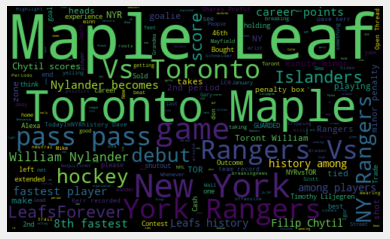

In [32]:
# word cloud plot
all_words = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 42, max_font_size = 119).generate(all_words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [33]:
# defining a function to compute the positive, negative and neutral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Sentiment
0,Toronto maple leafs,0.0,0.00,Neutral
1,William Nylander becomes the 8th-fastest play...,0.0,0.00,Neutral
2,The Maple Leafs game is tied 2-2\nleafs,0.4,-0.40,Negative
3,William Nylander becomes the 8th-fastest play...,0.0,0.00,Neutral
4,William Nylander becomes the 8th-fastest play...,0.0,0.00,Neutral
...,...,...,...,...
88,"2 goals and 2 PIM for Chytil, he trips up a Ma...",0.0,0.00,Neutral
89,Filip Chytil takes a 2-minute minor penalty in...,0.2,-0.05,Negative
90,Filip Chytil takes a 2-minute minor penalty in...,0.2,-0.05,Negative
91,"GUARDED Rangers 2, Maple Leafs 1 - 2nd - 1052 ...",0.3,0.20,Positive


In [34]:
polarity = []
subjectivity = []
tweetArr = []
polarArr = np.array([])
subArr = np.array([])

polarPos = 0
polarNeg = 0

subjectPos = 0
subjectNeg = 0

In [36]:
public_tweets = tweepy.Cursor(api.search, q=query, rpp=100, count=200, result_type="recent", include_entities=True, lang="en").items(20000) 
for i in public_tweets:
    tweetArr.append(i.text)
    analysis = TextBlob(i.text)
    
    polar = analysis.sentiment
    polarity.append(float(polar.polarity))
    
    if(polar.polarity > 0):
        polarPos+=1
    elif(polar.polarity < 0):
        polarNeg+=1
    else: pass
    
    subject = analysis.sentiment
    subjectivity.append(float(subject.subjectivity))
    if(subject.subjectivity > 0):
        subjectPos+=1
    elif(subject.subjectivity < 0):
        subejctNeg+=1

In [37]:
polarData = np.append(polarArr, polarity) 
subData = np.append(subArr, subjectivity)  
print(subData.size, " Results loaded!")
print("\nPositive polarity::  "  + str(polarPos/len(polarity)*100) + "% \tNegative polarity::  " + str(polarNeg/len(polarity)*100) + "%")
print("Positive subjectivity::  "  + str(subjectPos/len(subjectivity)*100) + "% \tNegative subjectivity::  " + str(subjectNeg/len(subjectivity)*100) + "%")
print("Median polarity:: ", np.median(polarData), "\t\t Median subjectivity::  ", np.median(subData))

10130  Results loaded!

Positive polarity::  39.88153998025666% 	Negative polarity::  13.613030602171767%
Positive subjectivity::  57.93682132280355% 	Negative subjectivity::  0.0%
Median polarity::  0.0 		 Median subjectivity::   0.23333333333333334


Text(0.5, 1.0, 'Twitter Sentiment Analysis')

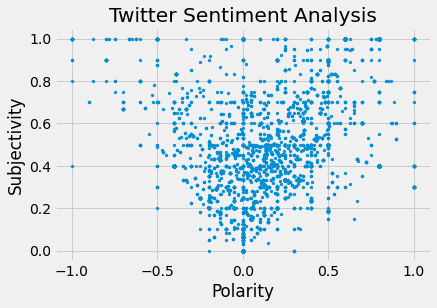

In [38]:
plt.scatter(polarData, subData, 8)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title('Twitter Sentiment Analysis')